In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Loading data from the previous notebook. 
# Essentially all we (fast_df["message_type"]==render[2])]did was boil down 250 files in five files. 
node_perf = pd.read_csv('./data/build_farm/node_perf.csv')
sub_perf = pd.read_csv('./data/build_farm/sub_perf.csv')
pub_perf = pd.read_csv('./data/build_farm/pub_perf.csv')
network_perf = pd.read_csv('./data/build_farm/perf_network_results.csv')
two_proc_network_perf = pd.read_csv('./data/build_farm/two_process_perf_network_results.csv')

In [3]:
#Give each vendor/flavor a color
connext_c = "blueviolet"
cyclone_c = "red"
fast_dca_c = "navy"
fast_cs_c = "blue"
fast_dcs_c = "cyan"
fast_ca_c = "green"

In [4]:
# Node performance is just the performance of a single node. 
# Let's split this into two tranches to plot, Memory and CPU
node_perf.head()
print(len(node_perf))

7


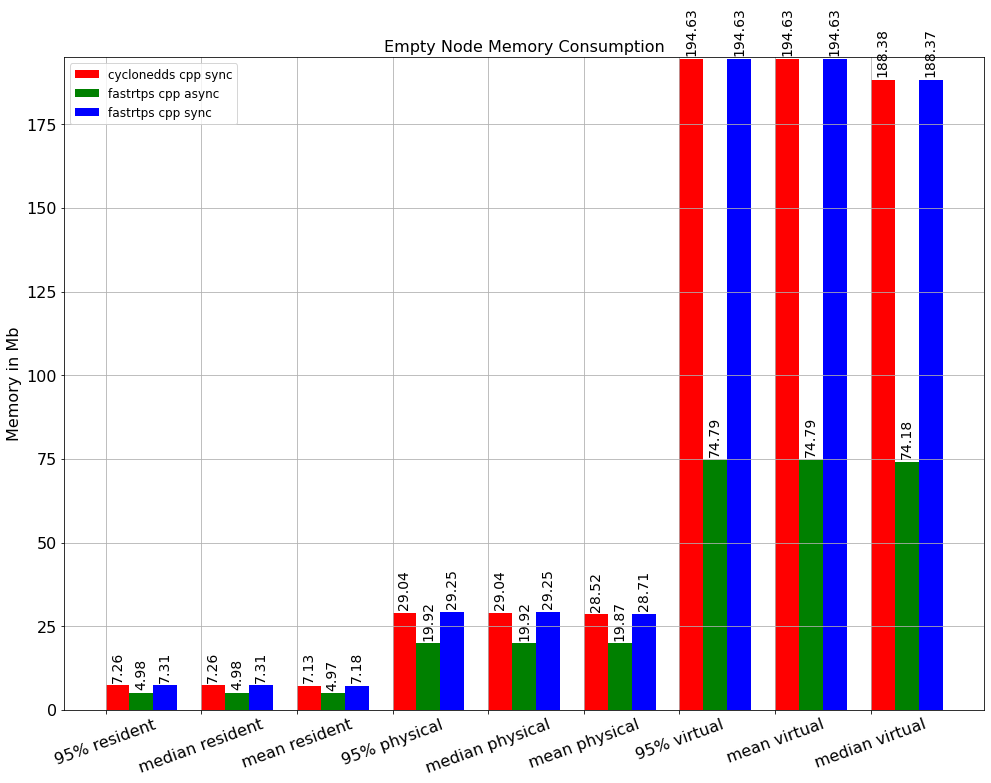

In [12]:
def autolabel(rects,rot=90):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize =14,
                    ha='center', va='bottom',rotation=rot)


target_cols = [3,4,5,6,7,8,12,13,14]
x_labels = node_perf.columns[3:9].append(node_perf.columns[12:15])
x_labels = ["95% resident","median resident","mean resident","95% physical","median physical","mean physical","95% virtual","mean virtual","median virtual"]

connext_rows = np.round(node_perf.iloc[0,target_cols].tolist(),2)
cyclone_rows = np.round(node_perf.iloc[1,target_cols].tolist(),2)
fast_dca_rows = np.round(node_perf.iloc[2,target_cols].tolist(),2)
fast_cs_rows = np.round(node_perf.iloc[3,target_cols].tolist(),2)
fast_dcs_rows = np.round(node_perf.iloc[4,target_cols].tolist(),2)
fast_ca_rows = np.round(node_perf.iloc[5,target_cols].tolist(),2)

x = np.arange(len(x_labels))*4# 6 # the label locations each bar gets three units, fast is split three ways
fast_width = 0.75  # the width of the bars, three together 
width = 1 # otherwise make them be a unit size

fig, ax = plt.subplots()
fig.set_size_inches(16.5,12) 

cyclone_rects = ax.bar(x, cyclone_rows, width, label='cyclonedds cpp sync',color=cyclone_c)
fast_ca_rects = ax.bar(x+width, fast_ca_rows, width, label='fastrtps cpp async', color=fast_ca_c)
fast_cs_rects = ax.bar(x+(2*width), fast_cs_rows, width, label='fastrtps cpp sync', color =fast_cs_c)


font = { 'size'   : 12 }
matplotlib.rc('font', **font)
parameters = {'axes.labelsize': 16,
              'axes.titlesize': 16}
plt.rcParams.update(parameters)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory in Mb')
ax.set_title('Empty Node Memory Consumption')
ax.set_xticks(x-0.5)
ax.set_xticklabels(x_labels,rotation=20)
ax.set_ylim(0,195)
ax.legend(loc="upper left")

plt.grid()
#autolabel(connext_rects)
autolabel(cyclone_rects)
#autolabel(fast_dca_rects)
autolabel(fast_cs_rects)
#autolabel(fast_dcs_rects)
autolabel(fast_ca_rects)

plt.savefig("./plots/BuildFarmRMWMemoryConsumption.png")
plt.show()


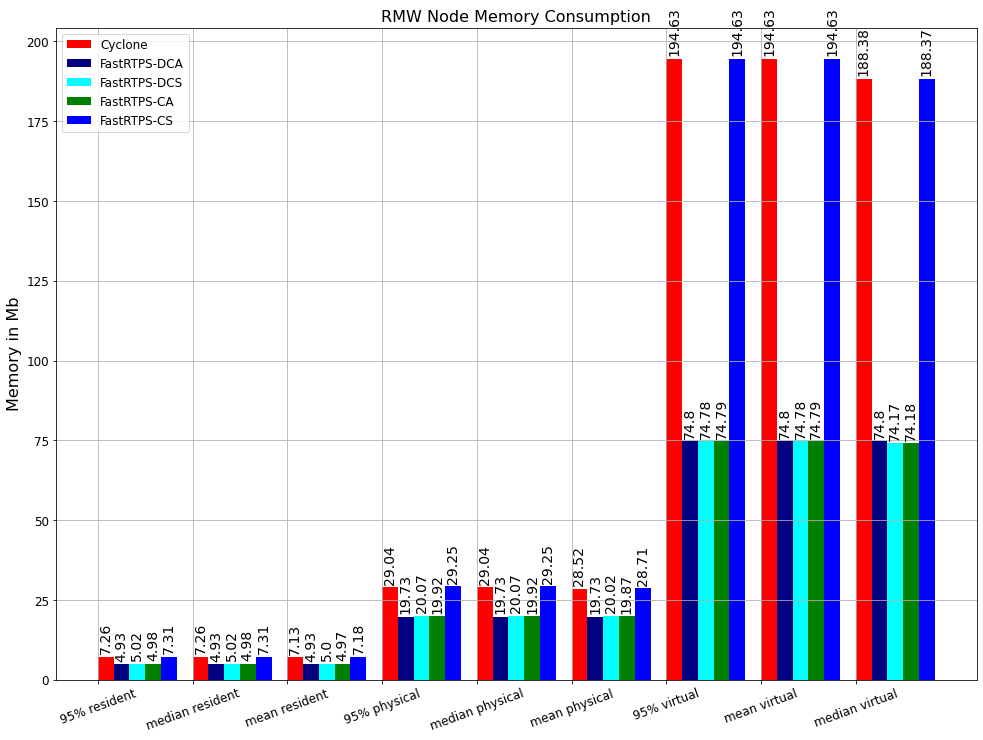

In [13]:
x = np.arange(len(x_labels))*6# the label locations each bar gets three units, fast is split three ways
width = 1 # otherwise make them be a unit size

fig, ax = plt.subplots()
fig.set_size_inches(16.5,12) 

#connext_rects = ax.bar(x, connext_rows, width, label='Connext',color=connext_c)
cyclone_rects = ax.bar(x+(1*width), cyclone_rows, width, label='Cyclone',color=cyclone_c)
fast_dca_rects = ax.bar(x+(2*width), fast_dca_rows, width, label='FastRTPS-DCA',color=fast_dca_c)
fast_dcs_rects = ax.bar(x+(3*width), fast_dcs_rows, width, label='FastRTPS-DCS', color=fast_dcs_c)
fast_ca_rects = ax.bar(x+(4*width), fast_ca_rows, width, label='FastRTPS-CA', color=fast_ca_c)
fast_cs_rects = ax.bar(x+(5*width), fast_cs_rows, width, label='FastRTPS-CS', color =fast_cs_c)


font = { 'size'   : 12 }
matplotlib.rc('font', **font)
parameters = {'axes.labelsize': 16,
              'axes.titlesize': 16}
plt.rcParams.update(parameters)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory in Mb')
ax.set_title('RMW Node Memory Consumption')
ax.set_xticks(x+0.5)
ax.set_xticklabels(x_labels,rotation=20)
#ax.set_ylim(0,165)
ax.legend(loc="upper left")

plt.grid()
#autolabel(connext_rects)
autolabel(cyclone_rects)
autolabel(fast_dca_rects)
autolabel(fast_cs_rects)
autolabel(fast_dcs_rects)
autolabel(fast_ca_rects)

plt.savefig("./plots/BuildFarmRMWMemoryConsumptionFULL.png")
plt.show()


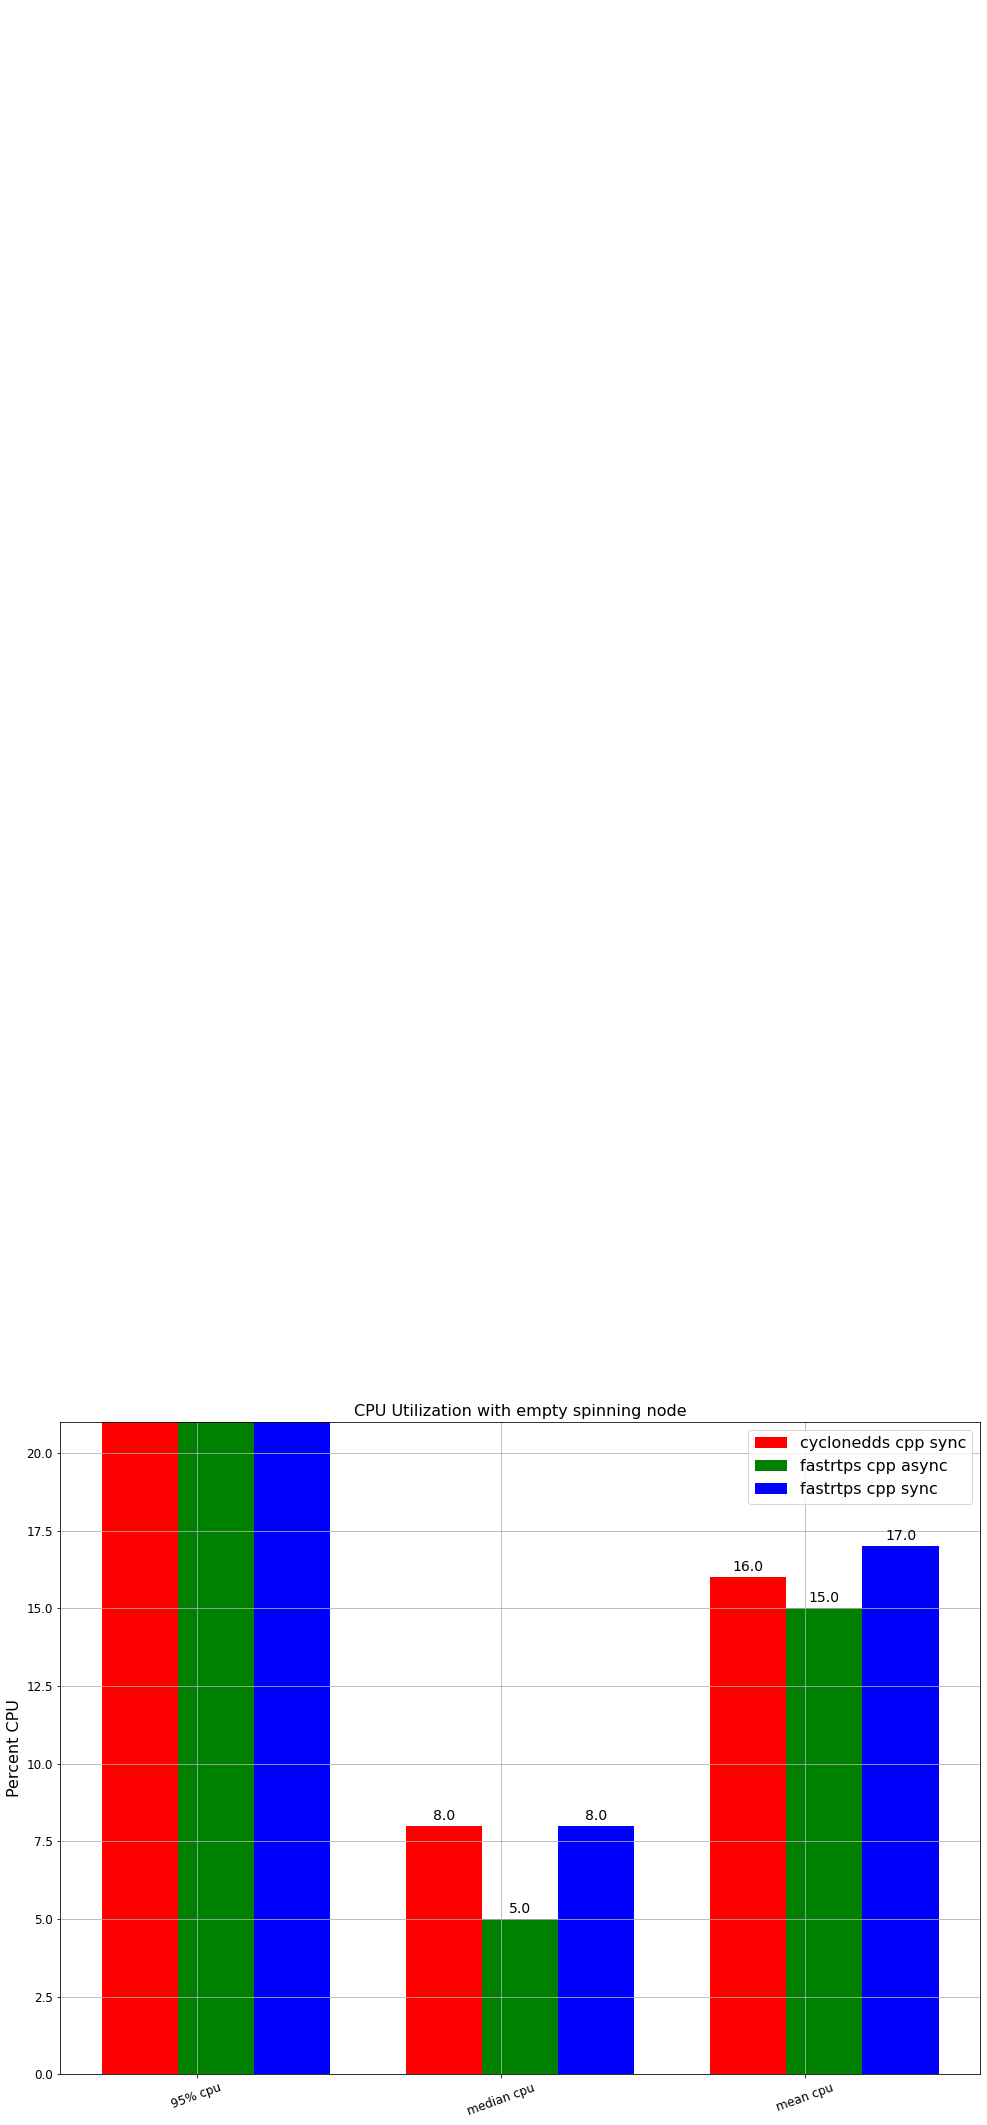

In [14]:
target_cols = [9,10,11]
x_labels = ["95% cpu","median cpu","mean cpu"]
connext_rows = np.round(node_perf.iloc[0,target_cols].tolist(),2)*100.00
cyclone_rows = np.round(node_perf.iloc[1,target_cols].tolist(),2)*100.00
fast_dca_rows = np.round(node_perf.iloc[2,target_cols].tolist(),2)*100.00
fast_cs_rows = np.round(node_perf.iloc[3,target_cols].tolist(),2)*100.00
fast_dcs_rows = np.round(node_perf.iloc[4,target_cols].tolist(),2)*100.00
fast_ca_rows = np.round(node_perf.iloc[5,target_cols].tolist(),2)*100.00

x = np.arange(len(x_labels))*4 # the label locations each bar gets three units, fast is split three ways

width = 1 # otherwise make them be a unit size

fig, ax = plt.subplots()
fig.set_size_inches(16.5,12) 


cyclone_rects = ax.bar(x, cyclone_rows, width, label='cyclonedds cpp sync',color=cyclone_c)
fast_ca_rects = ax.bar(x+width, fast_ca_rows, width, label='fastrtps cpp async', color=fast_ca_c)
fast_cs_rects = ax.bar(x+(2*width), fast_cs_rows, width, label='fastrtps cpp sync', color =fast_cs_c)

font = { 'size': 16 }

matplotlib.rc('font', **font)

parameters = {'axes.labelsize': 16,
              'axes.titlesize': 16}
plt.rcParams.update(parameters)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent CPU')
ax.set_title('CPU Utilization with empty spinning node')
ax.set_xticks(x+0.75)
ax.set_xticklabels(x_labels,rotation=20)
ax.legend()
ax.set_ylim(0,21)

plt.grid()
autolabel(cyclone_rects,rot=0)
autolabel(fast_cs_rects,rot=0)
autolabel(fast_ca_rects,rot=0)


plt.savefig("./plots/BuildFarmRMWCPUConsumption.png")
plt.show()


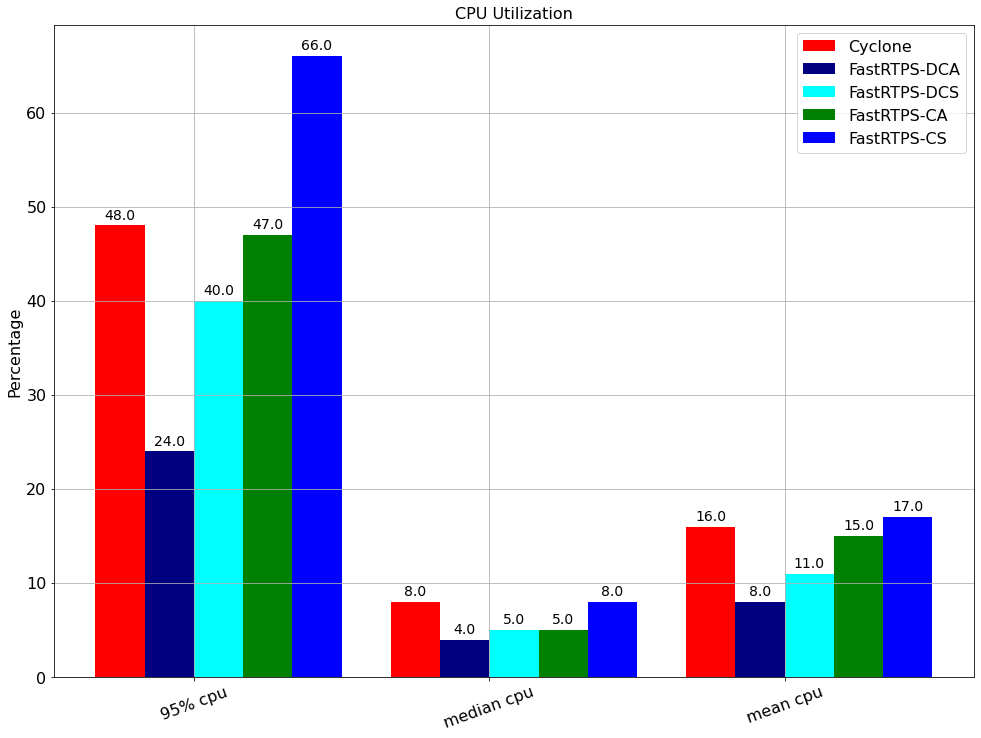

In [15]:
target_cols = [9,10,11]
x_labels = ["95% cpu","median cpu","mean cpu"]
x = np.arange(len(x_labels))*6 # the label locations each bar gets three units, fast is split three ways

width = 1 # otherwise make them be a unit size

fig, ax = plt.subplots()
fig.set_size_inches(16.5,12) 

#connext_rects = ax.bar(x, connext_rows, width, label='Connext',color=connext_c)
cyclone_rects = ax.bar(x+(0*width), cyclone_rows, width, label='Cyclone',color=cyclone_c)
fast_dca_rects = ax.bar(x+(1*width), fast_dca_rows, width, label='FastRTPS-DCA',color=fast_dca_c)
fast_dcs_rects = ax.bar(x+(2*width), fast_dcs_rows, width, label='FastRTPS-DCS', color=fast_dcs_c)
fast_ca_rects = ax.bar(x+(3*width), fast_ca_rows, width, label='FastRTPS-CA', color=fast_ca_c)
fast_cs_rects = ax.bar(x+(4*width), fast_cs_rows, width, label='FastRTPS-CS', color =fast_cs_c)

font = {'size'   : 16 }
matplotlib.rc('font', **font)

parameters = {'axes.labelsize': 16,
              'axes.titlesize': 16}
plt.rcParams.update(parameters)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('CPU Utilization')
ax.set_xticks(x+1.5)
ax.set_xticklabels(x_labels,rotation=20)
ax.legend()
#ax.set_ylim(0,21)

plt.grid()
#autolabel(connext_rects)
autolabel(cyclone_rects,rot=0)
autolabel(fast_dca_rects,rot=0)
autolabel(fast_cs_rects,rot=0)
autolabel(fast_dcs_rects,rot=0)
autolabel(fast_ca_rects,rot=0)


plt.savefig("./plots/BuildFarmRMWCPUConsumptionFULL.png")
plt.show()


In [16]:
# For our publishers first determine all teh permutations performed by getting the category names
out = set(zip(pub_perf["to_rmw"],pub_perf["to_rmw_flavor"]))
to_cats = [" ".join(o) for o in list(out)]
print(to_cats)
out = set(zip(pub_perf["from_rmw"],pub_perf["from_rmw_flavor"]))
from_cats = [" ".join(o) for o in list(out)]
print(from_cats)

TypeError: sequence item 1: expected str instance, float found

# CROSS - RMW DATA
*We're omitting this section for now, but it basically gives stats for every permutation of a simple sender / receiver for each RMW vendor. The plots give us an idea of how well the RMWs interoperate.*

In [10]:
def rmw_and_flavor_to_category(rmw,flavor):
    """
    Convert a pair into a string for printing / display
    """
    return "{0} {1}".format(rmw,flavor)

def df_col_to_matrix(df,column_name,to_cat_names, from_cat_names):
    """
    Go through a column in our csv file and remap each value from a given column 
    to a new matrix based on the source source and destination RWM vendor and flavor
    
    TODO: Double check this. 
    """
    ret_val = np.zeros([len(to_cat_names),len(from_cat_names)])
    temp_df = df[["to_rmw","to_rmw_flavor","from_rmw","from_rmw_flavor",column_name]]
    for i in range(0,len(temp_df)):
        from_cat = rmw_and_flavor_to_category(temp_df.iloc[i]["from_rmw"],temp_df.iloc[i]["from_rmw_flavor"])
        to_cat = rmw_and_flavor_to_category(temp_df.iloc[i]["to_rmw"],temp_df.iloc[i]["to_rmw_flavor"])
        x = to_cat_names.index(to_cat)
        y = from_cat_names.index(from_cat)
        ret_val[x,y] = temp_df.iloc[i][column_name]
    return ret_val


out = df_col_to_matrix(pub_perf , pub_perf.columns[7],to_cats,from_cats)
print(to_cats)
print(from_cats)
print(out)

NameError: name 'to_cats' is not defined

In [11]:
# Pick a parameter and generate a plot. Not sure how many of these we care about
# Be sure to invert the color map if necessary
# colormap_r = ListedColormap(colormap.colors[::-1])

print("Options for plotting are as follows")
print(pub_perf.columns[6:])
parameter = 10
print("Currently Plotting {0}".format(pub_perf.columns[parameter]))
result_matrix = df_col_to_matrix(pub_perf , pub_perf.columns[parameter],to_cats,from_cats)
result_matrix = np.round(result_matrix,2)
print(to_cats)
print(from_cats)

fig, ax = plt.subplots()
fig.set_size_inches(16.5,12) 

im = ax.imshow(result_matrix)#,cmap="cividis")

# We want to show all ticks...
ax.set_xticks(np.arange(len(from_cats)))
ax.set_yticks(np.arange(len(to_cats)))
# ... and label them with the respective list entries
from_cat_labels = [l.replace(" cpp","") for l in from_cats]
ax.set_xticklabels(from_cat_labels)
to_cat_labels = [l.replace(" cpp","") for l in to_cats]
ax.set_yticklabels(to_cat_labels)
ax.set_ylabel("Destination RMW Vendor")

ax.set_xlabel("Source RMW Vendor")
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(to_cats)):
    for j in range(len(from_cats)):
        text = ax.text(j, i, result_matrix[i, j],fontsize=16,
                       ha="center", va="center", color="white")

ax.set_title("Cross Publisher Performance for {0}".format(pub_perf.columns[parameter]))


plt.show()

Options for plotting are as follows
Index(['mean system virtual memory (Mb)', 'mean system_cpu_usage (%)',
       'sum lost', 'mean sent', 'mean received', 'max ru_maxrss',
       'Top 5% latency (ms)', 'median latency_mean (ms)',
       'mean latency_mean (ms)', 'resident anonymous memory (Mb)',
       'median resident anonymous memory (Mb)',
       'mean resident anonymous memory (Mb)', 'physical memory (Mb)',
       'median physical memory (Mb)', 'mean physical memory (Mb)',
       'cpu_usage (%)', 'median cpu_usage (%)', 'mean cpu_usage (%)',
       'virtual memory (Mb)', 'median virtual memory (Mb)',
       'mean virtual memory (Mb)'],
      dtype='object')
Currently Plotting mean received


NameError: name 'to_cats' is not defined

In [14]:
# Now repeate the same process for subscribers
# For our publishers first determine all teh permutations performed by getting the category names
out = set(zip(sub_perf["to_rmw"],sub_perf["to_rmw_flavor"]))
to_cats = [" ".join(o) for o in list(out)]
print(to_cats)
out = set(zip(sub_perf["from_rmw"],sub_perf["from_rmw_flavor"]))
from_cats = [" ".join(o) for o in list(out)]
print(from_cats)

['fastrtps cpp', 'cyclonedds cpp', 'fastrtps dynamic cpp', 'connext cpp']
['fastrtps dynamic cpp async', 'connext cpp async', 'fastrtps cpp async', 'fastrtps dynamic cpp sync', 'fastrtps cpp sync', 'cyclonedds cpp sync']


In [15]:
sub_perf.head()
print(len(sub_perf.columns))

27


Options for plotting are as follows
Index(['mean system virtual memory (Mb)', 'mean system_cpu_usage (%)',
       'sum lost', 'mean sent', 'mean received', 'max ru_maxrss',
       'Top 5% latency (ms)', 'median latency_mean (ms)',
       'mean latency_mean (ms)', 'resident anonymous memory (Mb)',
       'median resident anonymous memory (Mb)',
       'mean resident anonymous memory (Mb)', 'physical memory (Mb)',
       'median physical memory (Mb)', 'mean physical memory (Mb)',
       'cpu_usage (%)', 'median cpu_usage (%)', 'mean cpu_usage (%)',
       'virtual memory (Mb)', 'median virtual memory (Mb)',
       'mean virtual memory (Mb)'],
      dtype='object')
Currently Plotting median resident anonymous memory (Mb)
['fastrtps cpp', 'cyclonedds cpp', 'fastrtps dynamic cpp', 'connext cpp']
['fastrtps dynamic cpp async', 'connext cpp async', 'fastrtps cpp async', 'fastrtps dynamic cpp sync', 'fastrtps cpp sync', 'cyclonedds cpp sync']


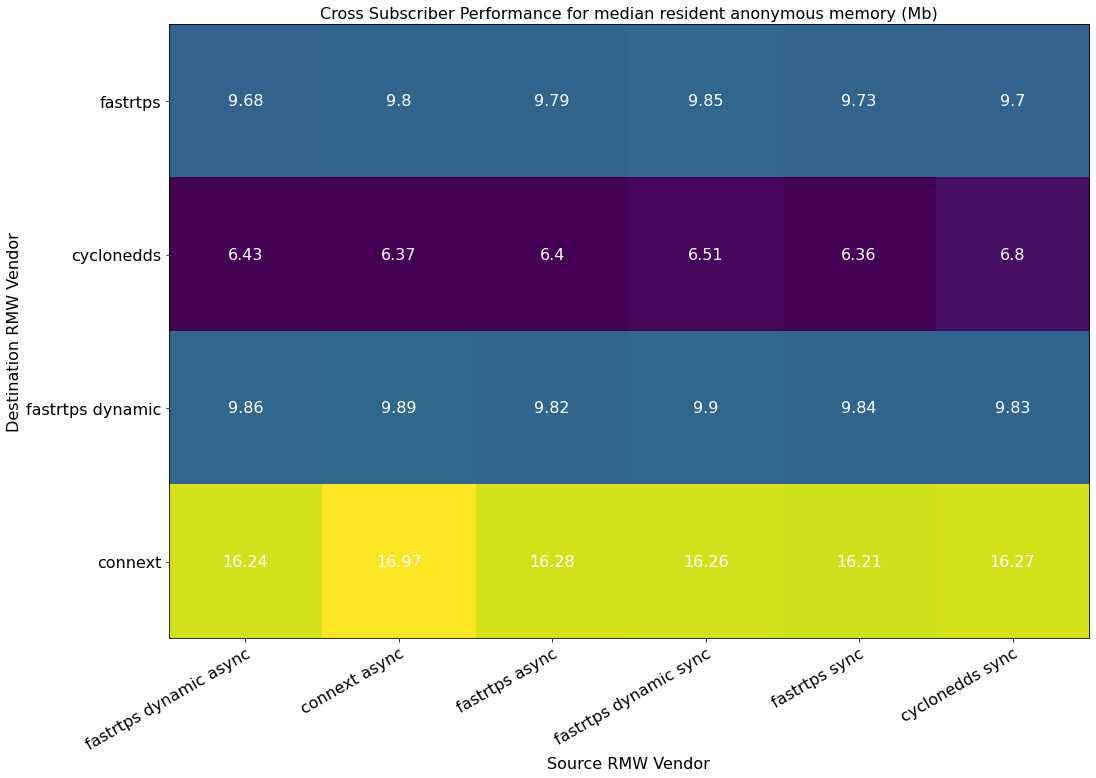

In [16]:
# Repeat everything for the subscriber. Could we aggregate these somehow?
print("Options for plotting are as follows")
print(sub_perf.columns[6:])
parameter = 16
print("Currently Plotting {0}".format(sub_perf.columns[parameter]))
result_matrix = df_col_to_matrix(sub_perf , sub_perf.columns[parameter],to_cats,from_cats)
result_matrix = np.round(result_matrix,2)
print(to_cats)
print(from_cats)

fig, ax = plt.subplots()
fig.set_size_inches(16.5,12) 

im = ax.imshow(result_matrix)#,cmap="cividis")

# We want to show all ticks...
ax.set_xticks(np.arange(len(from_cats)))
ax.set_yticks(np.arange(len(to_cats)))
# ... and label them with the respective list entries
from_cat_labels = [l.replace(" cpp","") for l in from_cats]
ax.set_xticklabels(from_cat_labels)
to_cat_labels = [l.replace(" cpp","") for l in to_cats]
ax.set_yticklabels(to_cat_labels)
ax.set_ylabel("Destination RMW Vendor")

ax.set_xlabel("Source RMW Vendor")
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(to_cats)):
    for j in range(len(from_cats)):
        text = ax.text(j, i, result_matrix[i, j],fontsize=16,
                       ha="center", va="center", color="white")

ax.set_title("Cross Subscriber Performance for {0}".format(sub_perf.columns[parameter]))


plt.show()

# These cells plot the network and perfomance data for a simple publisher / subscriber pair based on the underlying message size for each RMW. This allows us to see how the RMWs perform as message size changes. Each publisher sends 1000 messages to the subscriber and records the results. 

In [17]:
def make_ordered_dataset(vendor,flavor,param,df):
    """
    Get a data slice from the two proc tests given a vendor, a vendor flavor, and a parameter like "median_cpu" 
    The resulting list will be ordered by approximate size 
    """
    size_order = ["Array1k","Array4k","Array16k","Array32k","Array60k","PointCloud512k","Array1m","Array2m","Array4m","Array8m","PointCloud8m"]
    temp = df[df["vendor"]==vendor]
    if flavor and flavor != "" :
        temp = temp[temp["flavor"]==flavor]
    temp = temp[[param,"data_type"]]
    ret_val = []
    for sz in size_order:
        p = temp[temp["data_type"]==sz][param].values[0]
        ret_val.append(p)

    return ret_val,size_order

# Process our data to let us print all of the possible RMW Vendor / Config options and then print them out 
data,labels = make_ordered_dataset("cyclonedds",None,two_proc_network_perf.columns[7],two_proc_network_perf)

temp = []
for i in range(0,len(two_proc_network_perf)):
    temp.append((two_proc_network_perf["vendor"].iloc[i],two_proc_network_perf["flavor"].iloc[i]))
combos = sorted(set(temp))
# Print all of our options
print("Possible configurations (aka flavors): ")
print(set(two_proc_network_perf["flavor"].tolist()))
print("#"*25)
print("Possible vendors:")
print(set(two_proc_network_perf["vendor"].tolist()))
print("#"*25)
print("Total combinations of vendors / configurations:")
print(combos)
print("#"*25)
print("Columns we can plot against:")
print(two_proc_network_perf.columns.tolist())


Possible configurations (aka flavors): 
{'cpp_async', 'sync', 'async', 'cpp_sync', 'dynamic_cpp_sync', 'dynamic_cpp_async'}
#########################
Possible vendors:
{'connext', 'cyclonedds', 'fastrtps'}
#########################
Total combinations of vendors / configurations:
[('connext', 'cpp_async'), ('cyclonedds', 'cpp_sync'), ('fastrtps', 'async'), ('fastrtps', 'cpp_async'), ('fastrtps', 'cpp_sync'), ('fastrtps', 'dynamic_cpp_async'), ('fastrtps', 'dynamic_cpp_sync'), ('fastrtps', 'sync')]
#########################
Columns we can plot against:
['Unnamed: 0', 'file_name', 'data_type', 'flavor', 'vendor', '95th Percentile Data Received (Mb)', 'median data_received (Mb)', 'mean data_received (Mb)', 'median cpu_usage (%)', '95th Percentile CPU', 'mean cpu_usage (%)', 'sum lost', 'mean sent', 'mean received', 'max ru_maxrss', '95th Percentile Latency', 'median latency_mean (ms)', 'mean latency_mean (ms)']


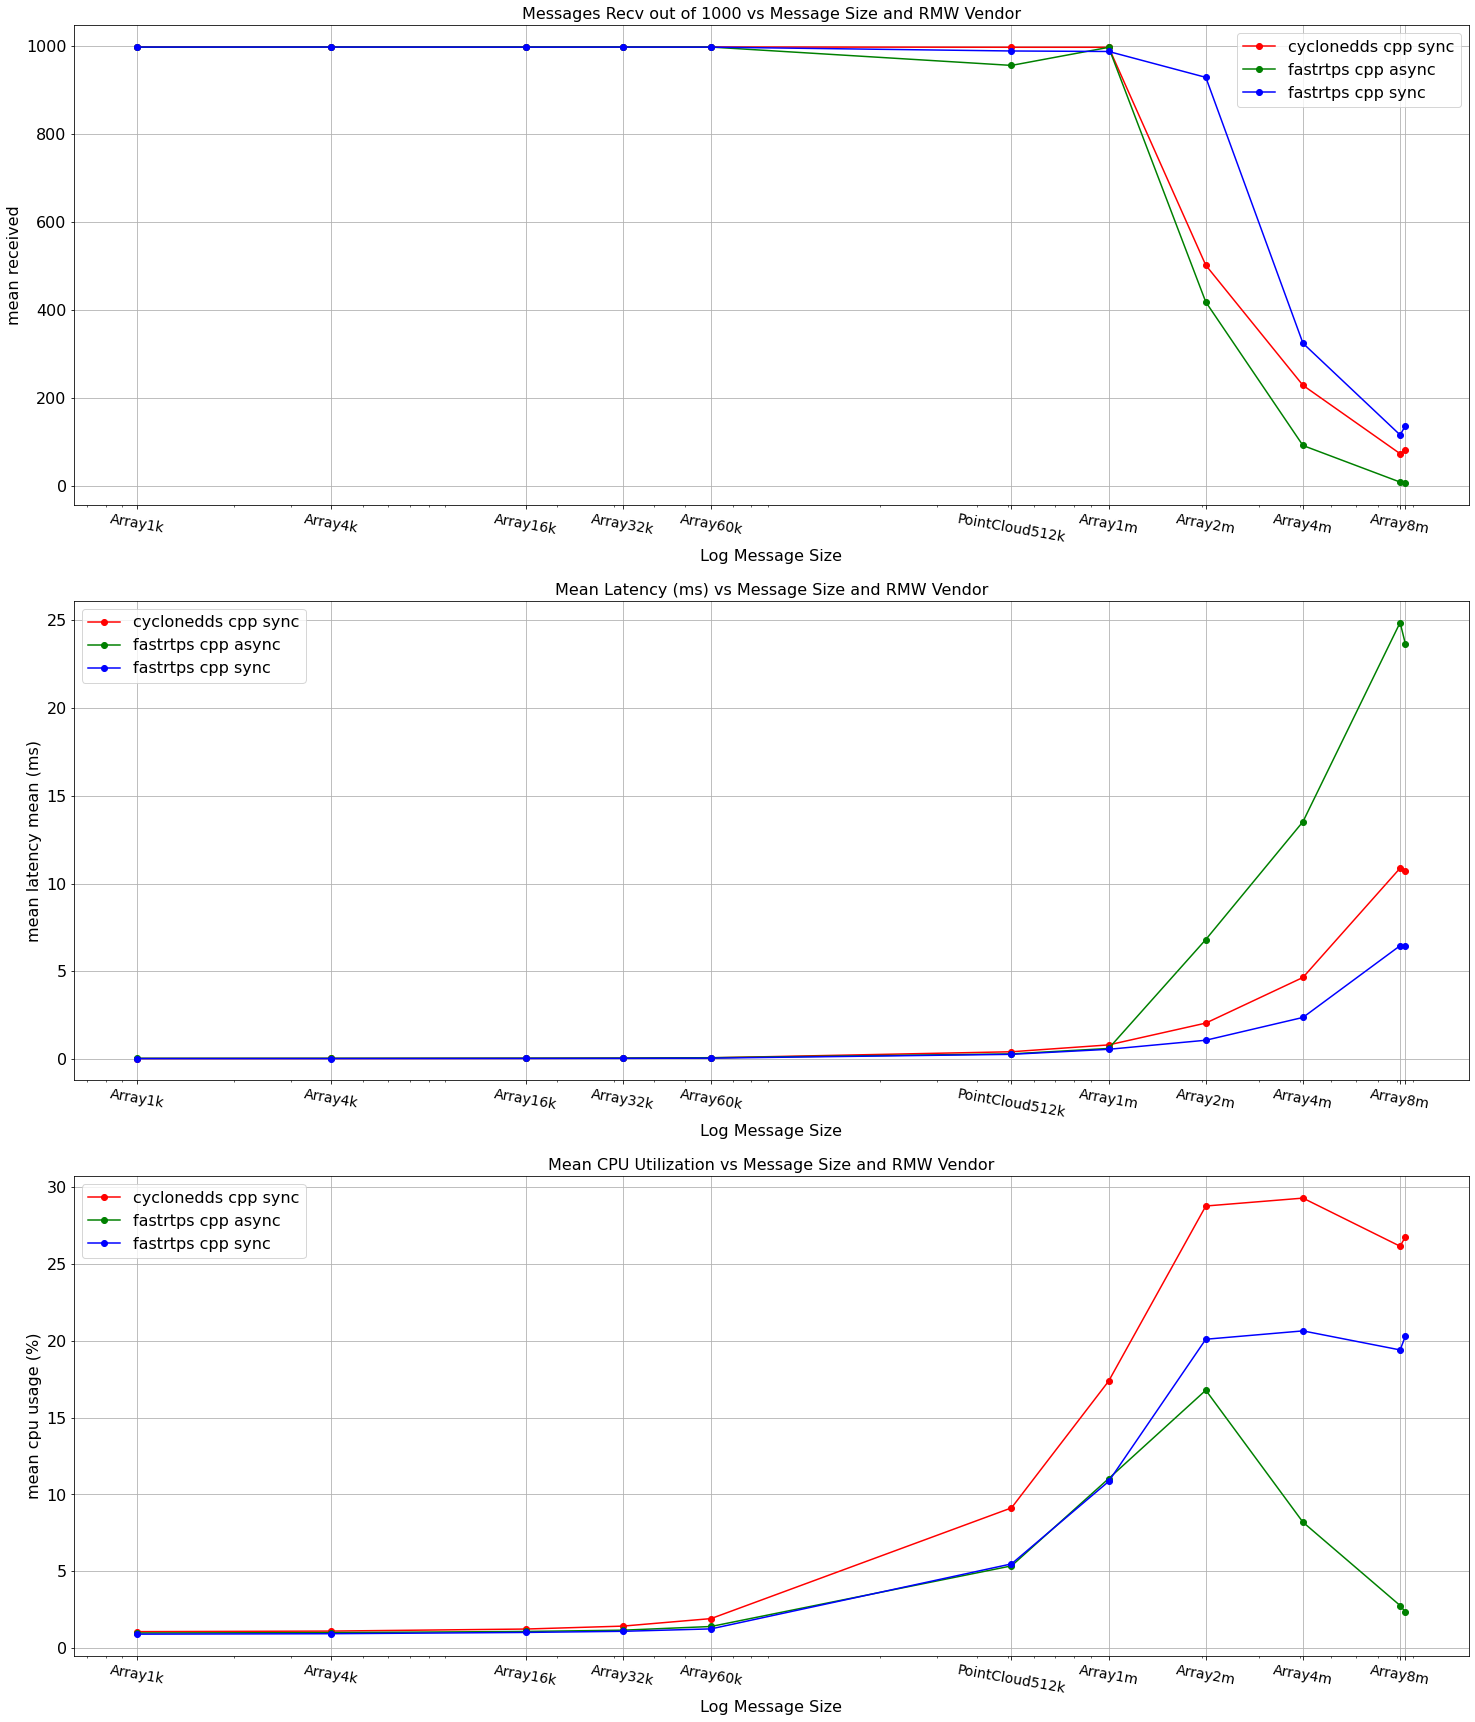

In [18]:
# Data for plotting: between five and 18
# Blessed plots are: [10, mean_cpu][13, Mean Recv--const sent][17, mean of mean latency]
#combos = [('connext', 'cpp_async'), ('cyclonedds', 'cpp_sync'), ('fastrtps', 'async'), ('fastrtps', 'cpp_async'), ('fastrtps', 'cpp_sync'), ('fastrtps', 'dynamic_cpp_async'), ('fastrtps', 'dynamic_cpp_sync'), ('fastrtps', 'sync')]
combos = [('cyclonedds', 'cpp_sync'),  ('fastrtps', 'cpp_async'), ('fastrtps', 'cpp_sync')]
plots = [13,17,10]
names = ["Messages Recv out of 1000","Mean Latency (ms)","Mean CPU Utilization"]
data_index = 17

colors = ["red","green","blue","black","orange","dodgerblue","aqua","violet"]
# NOTE: the 8mb array and pointcloud shouldn't plot on top of each othe so I fudge the size just a bit for clarity. 
estimated_size = [1,4,16,32,60,512,1024,2048,4096,8192,8500]
fig, ax = plt.subplots(3,1)
#fig.tight_layout(h_pad=0.5)
fig.set_size_inches(25,30) 

labels = []

for idx,plot in enumerate(plots):
    for combo, color in zip(combos,colors):
        d,labels = make_ordered_dataset(combo[0],combo[1],two_proc_network_perf.columns[plot],two_proc_network_perf)
        ax[idx].plot(estimated_size,d,'o-',color=color)
    
    legends = ["{0} {1}".format(combo[0],combo[1].replace("_"," ")) for combo in combos]    
    ylabel = two_proc_network_perf.columns[plot].replace("_"," ")

    # drop last label as it doesn't plot well
    labels = labels[:-1]
    labels.append("")

    # Plot for 17
    ax[idx].set(xlabel="Log Message Size", ylabel=ylabel,
           title='{0} vs Message Size and RMW Vendor'.format(names[idx]))

    ax[idx].grid()
    ax[idx].set_xscale('log')
    ax[idx].set_xticks(estimated_size)
    ax[idx].set_xticklabels(labels,rotation=-10,fontsize=14)
    ax[idx].legend(legends)

plt.savefig("./plots/PerfTestVsMsgSize.png")
plt.show()


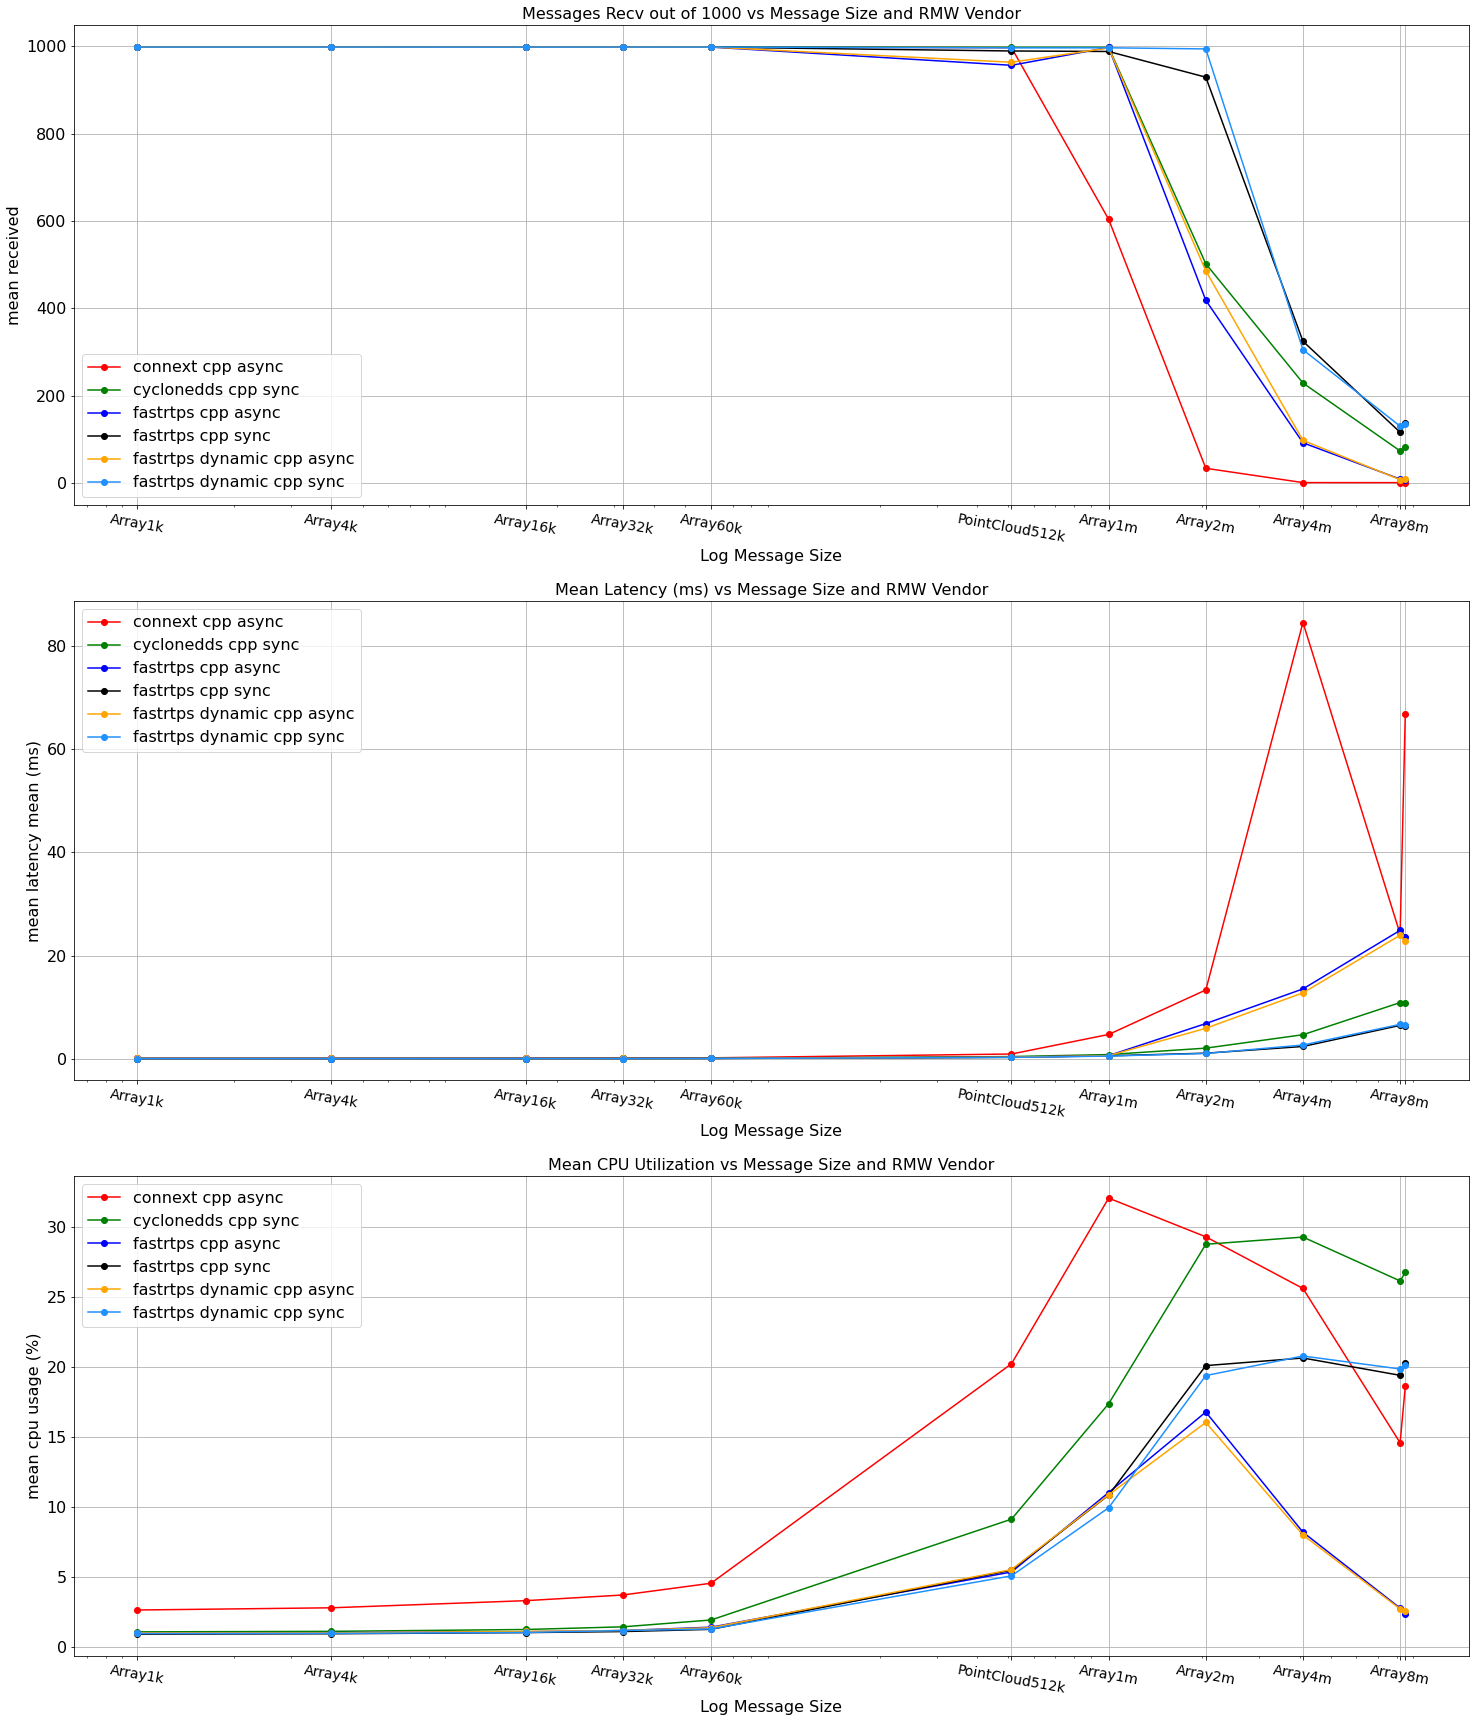

In [19]:
# Data for plotting: between five and 18
# Blessed plots are: [10, mean_cpu][13, Mean Recv--const sent][17, mean of mean latency]
plots = [13,17,10]
combos = [('connext', 'cpp_async'), ('cyclonedds', 'cpp_sync'), ('fastrtps', 'cpp_async'), ('fastrtps', 'cpp_sync'), ('fastrtps', 'dynamic_cpp_async'), ('fastrtps', 'dynamic_cpp_sync')]
names = ["Messages Recv out of 1000","Mean Latency (ms)","Mean CPU Utilization"]
data_index = 17

colors = ["red","green","blue","black","orange","dodgerblue","aqua","violet"]
# NOTE: the 8mb array and pointcloud shouldn't plot on top of each othe so I fudge the size just a bit for clarity. 
estimated_size = [1,4,16,32,60,512,1024,2048,4096,8192,8500]
fig, ax = plt.subplots(3,1)
fig.set_size_inches(25,30) 

labels = []

for idx,plot in enumerate(plots):
    for combo, color in zip(combos,colors):
        d,labels = make_ordered_dataset(combo[0],combo[1],two_proc_network_perf.columns[plot],two_proc_network_perf)
        ax[idx].plot(estimated_size,d,'o-',color=color)
    
    legends = ["{0} {1}".format(combo[0],combo[1].replace("_"," ")) for combo in combos]    
    ylabel = two_proc_network_perf.columns[plot].replace("_"," ")

    # drop last label as it doesn't plot well
    labels = labels[:-1]
    labels.append("")

    # Plot for 17
    ax[idx].set(xlabel="Log Message Size", ylabel=ylabel,
           title='{0} vs Message Size and RMW Vendor'.format(names[idx]))

    ax[idx].grid()
    ax[idx].set_xscale('log')
    ax[idx].set_xticks(estimated_size)
    ax[idx].set_xticklabels(labels,rotation=-10,fontsize=14)
    ax[idx].legend(legends)

plt.savefig("./plots/PerfTestVsMsgSizeFULL.png")
plt.show()
